In [12]:
import pandas as pd

In [13]:
from itertools import combinations

In [14]:
import numpy as np

In [15]:
from operator import itemgetter

In [16]:
with open('bigrams.csv', 'r', encoding='utf-8') as f:
    df = pd.read_csv(f)

In [17]:
df.head()

,Unnamed: 0,frequency,likelihood ratio,ngram,pmi,raw frequency,t score,tag
0,0,2677.0,-0.0,", ,",-2.296131,0.001082,-202.374264,", ,"
1,1,263.0,-0.0,", -",-2.104873,0.000106,-53.542925,", -"
2,2,204.0,-0.0,", :",-2.540684,0.000082,-68.824076,", :"
3,3,129.0,-0.0,", а",3.467534,0.000052,10.331071,", ADV"
4,4,6248.0,-0.0,", а",3.435401,0.002524,71.737750,", CONJ"


In [18]:
PUNCTUATION = ',.?!-:;'

In [20]:
first_word = []
second_word = []
first_tag = []
second_tag = []
pmi = []

for i in range(len(df)):
    if (df['tag'][i].split()[0] in 'SV' and df['tag'][i].split()[1] in 'SV') and not (len(df['ngram'][i].split()[0])==1 or len(df['ngram'][i].split()[1])==1):
        first_word.append(df['ngram'][i].split()[0])
        second_word.append(df['ngram'][i].split()[1])
        first_tag.append(df['tag'][i].split()[0])
        second_tag.append(df['tag'][i].split()[1])
        pmi.append('%.3f'%float(df['pmi'][i]))

In [21]:
sequences = pd.DataFrame({'first_word':first_word
                         , 'second_word':second_word
                         , 'first_tag':first_tag
                         , 'second_tag':second_tag
                         , 'pmi':pmi})

In [22]:
len(sequences)

182681

In [23]:
sequences.head()

,first_word,second_word,first_tag,second_tag,pmi
0,абалян,анна,S,S,16.432
1,аббас,обратился,S,V,16.285
2,аббатиса,хильдегарда,S,S,21.239
3,аббревиатура,применяется,S,V,12.217
4,аббревиатура,учк,S,S,18.917


In [24]:
import networkx as nx
G = nx.Graph()

In [25]:
for i in range(len(sequences)):
    first_node = '{0}, {1}'.format(sequences['first_word'][i], sequences['first_tag'][i])
    second_node = '{0}, {1}'.format(sequences['second_word'][i], sequences['second_tag'][i])
    if first_node in G.nodes() and not second_node in G.nodes():
        G.add_node(second_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    elif second_node in G.nodes() and not first_node in G.nodes():
        G.add_node(first_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    elif not first_node in G.nodes() and not second_node in G.nodes():
        G.add_node(first_node)
        G.add_node(second_node)
        G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
    else:
        pass

In [26]:
len(list(G.nodes()))

46106

In [27]:
import matplotlib.pyplot as plt

In [34]:
sub_graphs = list(nx.connected_component_subgraphs(G))

In [16]:
n = len(sub_graphs)

for i in range(n):
    print("Subgraph:", i, "consists of ",sub_graphs[i].nodes())

Subgraph: 0 consists of  ['абалян, S', 'ярославна, S', 'шестерякова, S', 'митрофанова, S', 'леонидовна, S', 'шентякова, S', 'михайловна, S', 'удивилась, V', 'щурова, S', 'владимировна, S', 'игоревна, S', 'ростиславовна, S', 'москвитина, S', 'анна, S', 'костина, S', 'дарья, S', 'николаевна, S', 'олеговна, S', 'сергеевна, S', 'юрьевна, S', 'ирина, S']
Subgraph: 1 consists of  ['махмуд, S', 'мекки, S', 'богданчиков, S', 'аббас, S', 'обратился, V', 'радиомолчание, S', 'шёнау, S', 'пантелеев, S']
Subgraph: 2 consists of  ['хильдегарда, S', 'аббатиса, S']
Subgraph: 3 consists of  ['полюса, S', 'аббревиатура, S', 'телисизация, S', 'применяется, V', 'учк, S']
Subgraph: 4 consists of  ['телесериала, S', 'выходу, S', 'гафур, S', 'закария, S', 'азиз, S', 'абдель, S', 'реформах, S', 'провидцем, S', 'равновесием, S', 'сте, S', 'имад, S', 'гафура, S', 'первопричиной, S', 'фаненко, S', 'оказался, V', 'малиновсий, S']
Subgraph: 5 consists of  ['абдраимов, S', 'разъяснил, V']
Subgraph: 6 consists of  [

Subgraph: 347 consists of  ['альфредом, S', 'альфред, S', 'сови, S', 'макалистер, S', 'экономистом, S']
Subgraph: 348 consists of  ['маршалла, S', 'перефразируя, V', 'альфреда, S', 'нобеля, S']
Subgraph: 349 consists of  ['лэнгле, S', 'альфрид, S', 'расширил, V', 'мотиваций, S']
Subgraph: 350 consists of  ['альфы, S', 'йенсена, S']
Subgraph: 351 consists of  ['скульптор, S', 'щербак, S', 'кузнецова, S', 'дмитриевна, S', 'ступенях, S', 'светлана, S', 'помнилась, V', 'алябьева, S']
Subgraph: 352 consists of  ['сын, S', 'амандус, S', 'окла, S', 'анеунос, S', 'ануеунока, S', 'лекаря, S', 'демеи, S', 'лугурихс, S']
Subgraph: 353 consists of  ['сена, S', 'амартии, S']
Subgraph: 354 consists of  ['защита, S', 'кредиторов, S', 'аматуччи, S', 'папой, S', 'карло, S', 'претензиям, S']
Subgraph: 355 consists of  ['данностями, S', 'отразилась, V', 'училищами, S', 'сознания, S', 'вирусам, S', 'амбивалентность, S', 'суперсистема, S', 'уничтожает, V', 'пластов, S', 'разорванность, S', 'ценностей, S', 

Subgraph: 541 consists of  ['арсенала, S', 'профконсультирования, S']
Subgraph: 542 consists of  ['информирует, V', 'оздоровления, S', 'предотвращения, S', 'лью, V', 'рассмотрением, S', 'заявке, S', 'арсенале, S', 'ограничится, V', 'руководителя, S', 'беспорядков, S', 'комбинации, S', 'инструментов, S', 'проецирования, S', 'распознавать, V', 'корректирования, S']
Subgraph: 543 consists of  ['артамонова, S', 'легенда, S']
Subgraph: 544 consists of  ['артели, S', 'ударник, S']
Subgraph: 545 consists of  ['артефакт, S', 'скрининга, S', 'отбора, S']
Subgraph: 546 consists of  ['артилле, S', 'рию, S']
Subgraph: 547 consists of  ['потопили, V', 'артиллерией, S']
Subgraph: 548 consists of  ['дойл, S', 'артур, S', 'конан, S']
Subgraph: 549 consists of  ['арутюняна, S', 'оптимизация, S']
Subgraph: 550 consists of  ['ической, S', 'археограф, S']
Subgraph: 551 consists of  ['жанна, S', 'археологией, S', 'участвует, V']
Subgraph: 552 consists of  ['ремарке, S', 'череды, S', 'битв, S', 'противоречи

Subgraph: 722 consists of  ['беатрис, S', 'уэббы, S']
Subgraph: 723 consists of  ['беге, S', 'надорвав, V']
Subgraph: 724 consists of  ['содействии, S', 'сотрудничеству, S', 'рио, S', 'бегуна, S', 'развитию, S']
Subgraph: 725 consists of  ['сербии, S', 'бомбардировок, S', 'бед, S', 'союзник, S', 'сконцентрировать, V', 'радиотелевидения, S']
Subgraph: 726 consists of  ['обидел, V', 'бежать, V', 'фгбун, S', 'вдовы, S', 'татевосов, S', 'эссе, S', 'дом, S', 'нева, S', 'ристиками, S', 'снабжался, V', 'газман, S']
Subgraph: 727 consists of  ['молва, S', 'бежит, V']
Subgraph: 728 consists of  ['коммунизма, S', 'безбожие, S']
Subgraph: 729 consists of  ['безвозмездность, S', 'изъятия, S']
Subgraph: 730 consists of  ['безнадежность, S', 'завладели, V']
Subgraph: 731 consists of  ['погубила, V', 'безнациональность, S', 'высылки, S', 'интеллигенции, S']
Subgraph: 732 consists of  ['безосновательность, S', 'стремлений, S']
Subgraph: 733 consists of  ['безра, S', 'ботица, S']
Subgraph: 734 consists

Subgraph: 972 consists of  ['находиться, V', 'боярышне, S']
Subgraph: 973 consists of  ['резервом, S', 'биоагентов, S', 'боясь, V', 'стимулировании, S', 'употребительности, S', 'утечек, S', 'признаться, V', 'увеличения, S']
Subgraph: 974 consists of  ['турции, S', 'патронажем, S', 'несоблюдения, S', 'боятся, V', 'констатации, S', 'чередование, S', 'господства, S']
Subgraph: 975 consists of  ['вершинам, S', 'видимостью, S', 'зеркало, S', 'экспроприатора, S', 'бояться, V', 'успеха, S', 'пожелание, S']
Subgraph: 976 consists of  ['жения, S', 'предло, S', 'комнаты, S', 'бра, S', 'налогообло, S', 'проваливались, V']
Subgraph: 977 consists of  ['печатью, S', 'избранности, S', 'якож, S', 'брадобритие, S']
Subgraph: 978 consists of  ['бражения, S', 'чемодана, S']
Subgraph: 979 consists of  ['корреспонденту, S', 'бражникова, S', 'владимировича, S']
Subgraph: 980 consists of  ['бразды, S', 'канцелярия, S', 'правления, S', 'журналов, S', 'ознакомились, V', 'треста, S', 'кормила, S']
Subgraph: 981

Subgraph: 1222 consists of  ['верностью, S', 'удержал, V']
Subgraph: 1223 consists of  ['вернули, V', 'сдачу, S']
Subgraph: 1224 consists of  ['иерусалим, S', 'налаживать, V', 'право, S', 'лять, S', 'эксплуатировать, V', 'завоевывает, V', 'пригласить, V', 'электората, S', 'дерябина, S', 'регресса, S', 'голоса, S', 'репутацию, S', 'отметили, V', 'завоевать, V', 'отстаивают, V', 'просчитывал, V', 'заслужить, V', 'сращивается, V', 'сумев, V', 'путал, V', 'доверие, S', 'спрашивать, V', 'одобрять, V', 'поведал, V', 'принципала, S', 'партиям, S', 'грааль, S', 'почина, S', 'породило, V', 'сверстникам, S', 'отдавая, V', 'удостоверяют, V', 'высоте, S', 'миру, S', 'разрешать, V', 'удостоверяет, V', 'опротестовать, V', 'знакомить, V', 'владельцам, S', 'отстает, V', 'обыске, S', 'разделились, V', 'вернуть, V', 'переходило, V']
Subgraph: 1225 consists of  ['майя, S', 'верованиями, S']
Subgraph: 1226 consists of  ['верой, S', 'куликовской, S', 'николаевной, S']
Subgraph: 1227 consists of  ['вероника

Subgraph: 1472 consists of  ['вол, S', 'ость, S']
Subgraph: 1473 consists of  ['челябинск, S', 'волгоград, S', 'иркутск, S']
Subgraph: 1474 consists of  ['наследодатель, S', 'дарителя, S', 'волеизъявление, S']
Subgraph: 1475 consists of  ['волкова, S', 'диалоги, S']
Subgraph: 1476 consists of  ['скачет, V', 'волком, S']
Subgraph: 1477 consists of  ['волнения, S', 'напоминают, V', 'тоны, S', 'длительностью, S']
Subgraph: 1478 consists of  ['февраля, S', 'волнениях, S']
Subgraph: 1479 consists of  ['волновал, V', 'умы, S']
Subgraph: 1480 consists of  ['правителя, S', 'волновали, V', 'жалование, S', 'милгрэма, S']
Subgraph: 1481 consists of  ['волнует, V', 'экология, S']
Subgraph: 1482 consists of  ['неймарком, S', 'володей, S']
Subgraph: 1483 consists of  ['магун, S', 'володя, S']
Subgraph: 1484 consists of  ['местоимении, S', 'событие, S', 'волонтеру, S']
Subgraph: 1485 consists of  ['клувер, S', 'волтерс, S']
Subgraph: 1486 consists of  ['члену, S', 'организовать, V', 'волыни, S', 'пом

Subgraph: 1722 consists of  ['моделировании, S', 'вычислимости, S']
Subgraph: 1723 consists of  ['грузоперевозок, S', 'объемов, S', 'подкорпусов, S', 'вычитания, S']
Subgraph: 1724 consists of  ['кучерова, S', 'вышел, V', 'указ, S']
Subgraph: 1725 consists of  ['вышли, V', 'идиомы, S', 'призывы, S']
Subgraph: 1726 consists of  ['пункта, S', 'макиавеллизма, S', 'удалении, S', 'выявилась, V', 'корреляция, S', 'липсетом, S']
Subgraph: 1727 consists of  ['обрушились, V', 'вьетнама, S']
Subgraph: 1728 consists of  ['длилось, V', 'вью, V']
Subgraph: 1729 consists of  ['вэб, S', 'инновации, S']
Subgraph: 1730 consists of  ['вяземская, S', 'гин, S', 'сравнивает, V', 'леманнова, S']
Subgraph: 1731 consists of  ['вяземский, S', 'относился, V']
Subgraph: 1732 consists of  ['вяземского, S', 'петренко, S', 'котла, S', 'сухой, S']
Subgraph: 1733 consists of  ['рукосуев, S', 'г-н, S']
Subgraph: 1734 consists of  ['г-на, S', 'пейтье, S', 'спросил, V']
Subgraph: 1735 consists of  ['габон, S', 'гана, S'

Subgraph: 1972 consists of  ['кардозо, S', 'густаво, S']
Subgraph: 1973 consists of  ['заявлял, V', 'гусьнай, S']
Subgraph: 1974 consists of  ['сэкономить, V', 'обещали, V', 'тонно-километров, S', 'возмещать, V', 'гутько, S', 'очертить, V']
Subgraph: 1975 consists of  ['гэблдон, S', 'сериале, S', 'чужестранка, S']
Subgraph: 1976 consists of  ['гэблера, S', 'переосмысливая, V']
Subgraph: 1977 consists of  ['зямлю, V', 'гэту, S']
Subgraph: 1978 consists of  ['гювара, S', 'нуриева, S']
Subgraph: 1979 consists of  ['гюльчатай, V', 'погибла, V']
Subgraph: 1980 consists of  ['лингвист, S', 'гюльшан, S', 'эрик, S', 'исмайлова, S']
Subgraph: 1981 consists of  ['каном, S', 'гюставом, S']
Subgraph: 1982 consists of  ['давай, V', 'плясать, V']
Subgraph: 1983 consists of  ['помиримся, V', 'давайте, V']
Subgraph: 1984 consists of  ['инструкция, S', 'давалась, V']
Subgraph: 1985 consists of  ['давыденковой, S', 'кооперация, S']
Subgraph: 1986 consists of  ['давыдов, S', 'давыдова, S']
Subgraph: 1987

Subgraph: 2221 consists of  ['наследодателя, S', 'долгам, S']
Subgraph: 2222 consists of  ['долговым, S', 'обязательствам, S']
Subgraph: 2223 consists of  ['вишневский, S', 'долголетия, S']
Subgraph: 2224 consists of  ['чжонги, S', 'долгу, S', 'приближением, S', 'хентэк, S', 'ким, S', 'негодяем, S']
Subgraph: 2225 consists of  ['оплате, S', 'должност, S', 'спортивпоследователям, S']
Subgraph: 2226 consists of  ['доллар, S', 'подешевел, V', 'обесценения, S']
Subgraph: 2227 consists of  ['рейхсфюреру, S', 'доложил, V']
Subgraph: 2228 consists of  ['разойдутся, V', 'домам, S']
Subgraph: 2229 consists of  ['домашних, S', 'смещалась, V', 'хозяйств, S']
Subgraph: 2230 consists of  ['сканделла, S', 'доменико, S', 'мельника, S']
Subgraph: 2231 consists of  ['предаемся, V', 'доминировали, V', 'всемогущества, S', 'иллюзии, S']
Subgraph: 2232 consists of  ['ориентации, S', 'вну, S', 'обусловливался, V', 'функциональности, S', 'доминированием, S']
Subgraph: 2233 consists of  ['ульпианом, S', 'доми

Subgraph: 2471 consists of  ['закопать, V', 'трупы, S', 'сложили, V', 'шахт, S', 'родзинского, S']
Subgraph: 2472 consists of  ['фиксацию, S', 'закрепление, S', 'вербовки, S']
Subgraph: 2473 consists of  ['митрополитом, S', 'закреплялось, V', 'попечение, S']
Subgraph: 2474 consists of  ['закручиванием, S', 'закручивание, S', 'гаек, S']
Subgraph: 2475 consists of  ['художница, S', 'рывком, S', 'открыла, V', 'сената, S', 'заседание, S', 'закрывал, V']
Subgraph: 2476 consists of  ['тренировки, S', 'окно, S', 'закрывая, V']
Subgraph: 2477 consists of  ['закупку, S', 'автотехники, S']
Subgraph: 2478 consists of  ['закусила, V', 'губу, S']
Subgraph: 2479 consists of  ['беляшами, S', 'закусывали, V']
Subgraph: 2480 consists of  ['купмэнс, S', 'рууд, S', 'зал, S']
Subgraph: 2481 consists of  ['ожидания, S', 'трейдером, S', 'приезда, S', 'зала, S']
Subgraph: 2482 consists of  ['здания, S', 'придворный, S', 'интриган, S', 'зале, S']
Subgraph: 2483 consists of  ['баки, S', 'залить, V', 'прочистит

Subgraph: 2721 consists of  ['институцией, S', 'невоз, S']
Subgraph: 2722 consists of  ['гая, S', 'институции, S']
Subgraph: 2723 consists of  ['инструктор, S', 'соцвос, S']
Subgraph: 2724 consists of  ['инструкций, S', 'регламентов, S']
Subgraph: 2725 consists of  ['интегральностью, S', 'охватом, S']
Subgraph: 2726 consists of  ['интегри, S', 'рованности, S', 'ствие, S']
Subgraph: 2727 consists of  ['подарка, S', 'интегрированност, S', 'получении, S']
Subgraph: 2728 consists of  ['лов, S', 'интеллектуа, S']
Subgraph: 2729 consists of  ['интенсификация, S', 'увольнений, S']
Subgraph: 2730 consists of  ['интернетресурсов, S', 'пользователями, S']
Subgraph: 2731 consists of  ['тации, S', 'интерпре, S']
Subgraph: 2732 consists of  ['интерпретаторам, S', 'моррис, S']
Subgraph: 2733 consists of  ['интерпретациях, S', 'опасностей, S']
Subgraph: 2734 consists of  ['цитаты, S', 'интертекстуальности, S']
Subgraph: 2735 consists of  ['перебил, V', 'интригами, S']
Subgraph: 2736 consists of  ['ай

Subgraph: 2971 consists of  ['кончике, S', 'пера, S']
Subgraph: 2972 consists of  ['конъектура, S', 'транскриптора, S']
Subgraph: 2973 consists of  ['конь, S', 'упал, V']
Subgraph: 2974 consists of  ['коньяка, S', 'курвуазье, S']
Subgraph: 2975 consists of  ['рокоссовский, S', 'коня, S']
Subgraph: 2976 consists of  ['кярна, S', 'коп, S']
Subgraph: 2977 consists of  ['поютъ, V', 'трещатъ, V', 'копиа, S', 'морава, S']
Subgraph: 2978 consists of  ['копие, S', 'приломити, S']
Subgraph: 2979 consists of  ['приламати, S', 'копиемъ, S']
Subgraph: 2980 consists of  ['одобрению, S', 'копирование, S', 'парламентом, S']
Subgraph: 2981 consists of  ['копулы, S', 'копулой, S', 'стьюдента, S']
Subgraph: 2982 consists of  ['костьми, S', 'копытами, S', 'копыты, S']
Subgraph: 2983 consists of  ['острие, S', 'метание, S', 'копья, S', 'молота, S']
Subgraph: 2984 consists of  ['кор, S', 'нилов, S']
Subgraph: 2985 consists of  ['пустили, V', 'коренья, S']
Subgraph: 2986 consists of  ['каби, S', 'кори, S', 

Subgraph: 3221 consists of  ['тренер, S', 'матча, S']
Subgraph: 3222 consists of  ['сезона, S', 'матчей, S']
Subgraph: 3223 consists of  ['рукою, S', 'махнул, V']
Subgraph: 3224 consists of  ['грядка, S', 'машина, S']
Subgraph: 3225 consists of  ['машиностроение, S', 'металлургия, S']
Subgraph: 3226 consists of  ['функционировали, V', 'маяка, S']
Subgraph: 3227 consists of  ['медали, S', 'фриша, S']
Subgraph: 3228 consists of  ['медина, S', 'бракамонте, S']
Subgraph: 3229 consists of  ['концепциями, S', 'мейнстрима, S']
Subgraph: 3230 consists of  ['мелиссена, S', 'редактора, S']
Subgraph: 3231 consists of  ['произносил, V', 'мелодию, S']
Subgraph: 3232 consists of  ['мелочи, S', 'обманули, V']
Subgraph: 3233 consists of  ['мемасы, S', 'мемчики, S']
Subgraph: 3234 consists of  ['мемориала, S', 'освенцим, S']
Subgraph: 3235 consists of  ['менедж, S', 'моделирует, V']
Subgraph: 3236 consists of  ['менин, S', 'шаарым, S']
Subgraph: 3237 consists of  ['менителями, S', 'фаллоса, S']
Subgrap

Subgraph: 3471 consists of  ['счетоводства, S', 'новам, S']
Subgraph: 3472 consists of  ['уцелел, V', 'успенский, S', 'яков, S', 'новиков, S']
Subgraph: 3473 consists of  ['отнялись, V', 'ноги, S', 'подкосились, V']
Subgraph: 3474 consists of  ['ногою, S', 'запинается, V']
Subgraph: 3475 consists of  ['нож, S', 'срисовала, V', 'лобзиком, S', 'срисовав, V']
Subgraph: 3476 consists of  ['силезия, S', 'нойхаммер, S']
Subgraph: 3477 consists of  ['чес, S', 'эко, S', 'номи, S', 'номика, S']
Subgraph: 3478 consists of  ['кадрам, S', 'номинациям, S']
Subgraph: 3479 consists of  ['нормативом, S', 'формировании, S', 'мыследеятельности, S', 'рол, S']
Subgraph: 3480 consists of  ['ношение, S', 'миллза, S']
Subgraph: 3481 consists of  ['туфель, S', 'ношением, S']
Subgraph: 3482 consists of  ['чадры, S', 'ношения, S']
Subgraph: 3483 consists of  ['нуждались, V', 'телом, S']
Subgraph: 3484 consists of  ['нуукской, S', 'декларацией, S']
Subgraph: 3485 consists of  ['рекосте, S', 'нъ, S', 'рози, S', '

Subgraph: 3721 consists of  ['перстом, S', 'дружинин, S']
Subgraph: 3722 consists of  ['перуну, S', 'старик, S', 'цыган, S']
Subgraph: 3723 consists of  ['перфек, S', 'ционизм, S']
Subgraph: 3724 consists of  ['пест, S', 'рота, S']
Subgraph: 3725 consists of  ['петербурге, S', 'орлай, S']
Subgraph: 3726 consists of  ['петлю, S', 'полезай, V']
Subgraph: 3727 consists of  ['печатал, V', 'наброски, S']
Subgraph: 3728 consists of  ['хранение, S', 'корма, S', 'печивал, V']
Subgraph: 3729 consists of  ['печь, S', 'хлеб, S']
Subgraph: 3730 consists of  ['кристенсен, S', 'пиа, S']
Subgraph: 3731 consists of  ['кровя, V', 'пил, V']
Subgraph: 3732 consists of  ['ямпольский, S', 'рувимович, S', 'пинхус, S']
Subgraph: 3733 consists of  ['писате, S', 'ляреалиста, S']
Subgraph: 3734 consists of  ['жаном, S', 'писателями, S', 'философомэкзистенциалистом, S']
Subgraph: 3735 consists of  ['письменность, S', 'троицкого, S']
Subgraph: 3736 consists of  ['соками, S', 'питаясь, V']
Subgraph: 3737 consists 

Subgraph: 3971 consists of  ['пуркуа, S', 'туше, S']
Subgraph: 3972 consists of  ['пускать, V', 'дым, S']
Subgraph: 3973 consists of  ['пустословие, S', 'звучало, V']
Subgraph: 3974 consists of  ['красноармеец, S', 'пустыни, S']
Subgraph: 3975 consists of  ['пушкарев, S', 'пушкарева, S']
Subgraph: 3976 consists of  ['вылетает, V', 'пушки, S']
Subgraph: 3977 consists of  ['пушкинистов, S', 'совокупляет, V']
Subgraph: 3978 consists of  ['касожьскыми, S', 'пълкы, S']
Subgraph: 3979 consists of  ['аппроксиматоры, S', 'пыры, S']
Subgraph: 3980 consists of  ['шихся, V', 'пытав, V']
Subgraph: 3981 consists of  ['пыталось, V', 'встроиться, V']
Subgraph: 3982 consists of  ['пьяница, S', 'пожарник, S']
Subgraph: 3983 consists of  ['потопташа, S', 'пятокъ, S']
Subgraph: 3984 consists of  ['работами, S', 'итальянцев, S']
Subgraph: 3985 consists of  ['местам, S', 'рабочим, S']
Subgraph: 3986 consists of  ['рабы, S', 'идентифицировали, V']
Subgraph: 3987 consists of  ['дисперсий, S', 'равенстве, S',

Subgraph: 4220 consists of  ['кувшин, S', 'стихе, S']
Subgraph: 4221 consists of  ['припевок, S', 'стихом, S']
Subgraph: 4222 consists of  ['стихотворства, S', 'карамзин, S']
Subgraph: 4223 consists of  ['стражи, S', 'обязуюсь, V']
Subgraph: 4224 consists of  ['ификрата, S', 'стратега, S']
Subgraph: 4225 consists of  ['стратегов, S', 'хабрия, S']
Subgraph: 4226 consists of  ['самовластье, S', 'страшит, V']
Subgraph: 4227 consists of  ['прекрати, V', 'стрельба, S']
Subgraph: 4228 consists of  ['стрибожи, S', 'внуци, S']
Subgraph: 4229 consists of  ['эткинд, S', 'строфика, S']
Subgraph: 4230 consists of  ['струны, S', 'въскладаше, S']
Subgraph: 4231 consists of  ['посу, S', 'стук, S']
Subgraph: 4232 consists of  ['молотком, S', 'стучать, V']
Subgraph: 4233 consists of  ['гарднер, S', 'стэнли, S']
Subgraph: 4234 consists of  ['стяги, S', 'плещут, V']
Subgraph: 4235 consists of  ['стекло, S', 'стёклышко, S']
Subgraph: 4236 consists of  ['субъ, S', 'ектов, S', 'ектности, S']
Subgraph: 4237 

In [17]:
n

4466

In [35]:
def draw_graph(sample_graph):
    sample_dcent = nx.degree_centrality(sample_graph)
    sample_sizes = [x*4000 for x in sample_dcent.values()]
    sample_colors = [float(x) for x in sample_dcent.values()]
    plt.figure(figsize=(20,20))
    plt.axis('off')
    nx.draw_networkx(sample_graph
                     , with_labels=True
                     , node_size=sample_sizes
                     , node_color = sample_colors
                     , cmap = plt.cm.winter
                     , font_size=14
                     , alpha=0.9)

In [36]:
def find_substitution_pairs(subgraph):
    sg_degrees = sorted(nx.degree(subgraph),reverse=True,key=itemgetter(1))
    candidate_nodes = [i[0] for i in sg_degrees if i[1] >= 3]
    candidate_pairs = []
    for i in list(set(combinations(candidate_nodes,2))):
        if subgraph.has_edge(i[0], i[1])==False:
            path = nx.shortest_path_length(subgraph,source=i[0],target=i[1])
            if i[0].split()[1] != i[1].split()[1]:
                if path == 3:
                    candidate_pairs.append((i, path))
            elif i[0].split()[1] == i[1].split()[1]:
                if path <= 3:
                    candidate_pairs.append((i, path))
    return candidate_pairs

In [75]:
def candidate_lookup(graph, node_pair):
    first_word = node_pair[0][0].split()[0][:-1]
    first_tag = node_pair[0][0].split()[1]
    second_word = node_pair[0][1].split()[0][:-1]
    second_tag = node_pair[0][1].split()[1]
    
    first_node_children = dict(graph[node_pair[0][0]])
    second_node_children = dict(graph[node_pair[0][1]])
    
    first_substitutes = {}
    second_substitutes = {}
    
    if node_pair[1] == 2:
        #search for nodes between them
        for k, v in first_node_children.items():
            if k.split()[1] == second_tag and k in second_node_children.keys():
                first_substitutes.update({k:1})
        for k, v in second_node_children.items():
            if k.split()[1] == first_tag and k in first_node_children.keys():
                second_substitutes.update({k:1})
                
    elif node_pair[1] > 2:

        for child, pmi in second_node_children.items():
            if child.split()[1] == first_tag:
                grandchildren = dict(graph[child])
                rank = 0
                for grandchild, g_pmi in grandchildren.items():
                    if grandchild.split()[1] == second_tag and grandchild in first_node_children.keys():
                        rank += 1
                if rank > 0:
                    first_substitutes.update({child:rank})

        for child, pmi in first_node_children.items():
            if child.split()[1] == second_tag:
                grandchildren = dict(graph[child])
                rank = 0
                for grandchild, g_pmi in grandchildren.items():
                    if grandchild.split()[1] == first_tag and grandchild in second_node_children.keys():
                        rank += 1
                if rank > 0:
                    second_substitutes.update({child:rank})
    
    sub1 = {}
    sub2 = {}
    
    for key in first_substitutes.keys():
        if '{0} {1}'.format(key.split()[0][:-1], second_word) in df.ngram.unique():
            sub1.update({key:first_substitutes[key]})
            
    for key in second_substitutes.keys():
        if '{0} {1}'.format(first_word, key.split()[0][:-1]) in df.ngram.unique():
            sub2.update({key:second_substitutes[key]})
            
    if sub1 or sub2:                  
        return (sub1, sub2)
    else:
        return None

In [38]:
def print_candidates(graph):
    candidate_pairs = find_substitution_pairs(graph)
    for pair in candidate_pairs:
        substitutes = candidate_lookup(graph, pair)
        if substitutes:
            print('Pair: {}'.format(pair[0]))
            print('path length: {}'.format(pair[1]))
            print('first word substitutes:')
            print(substitutes[0])
            print('second word substitutes:')
            print(substitutes[1])
            print('*******')

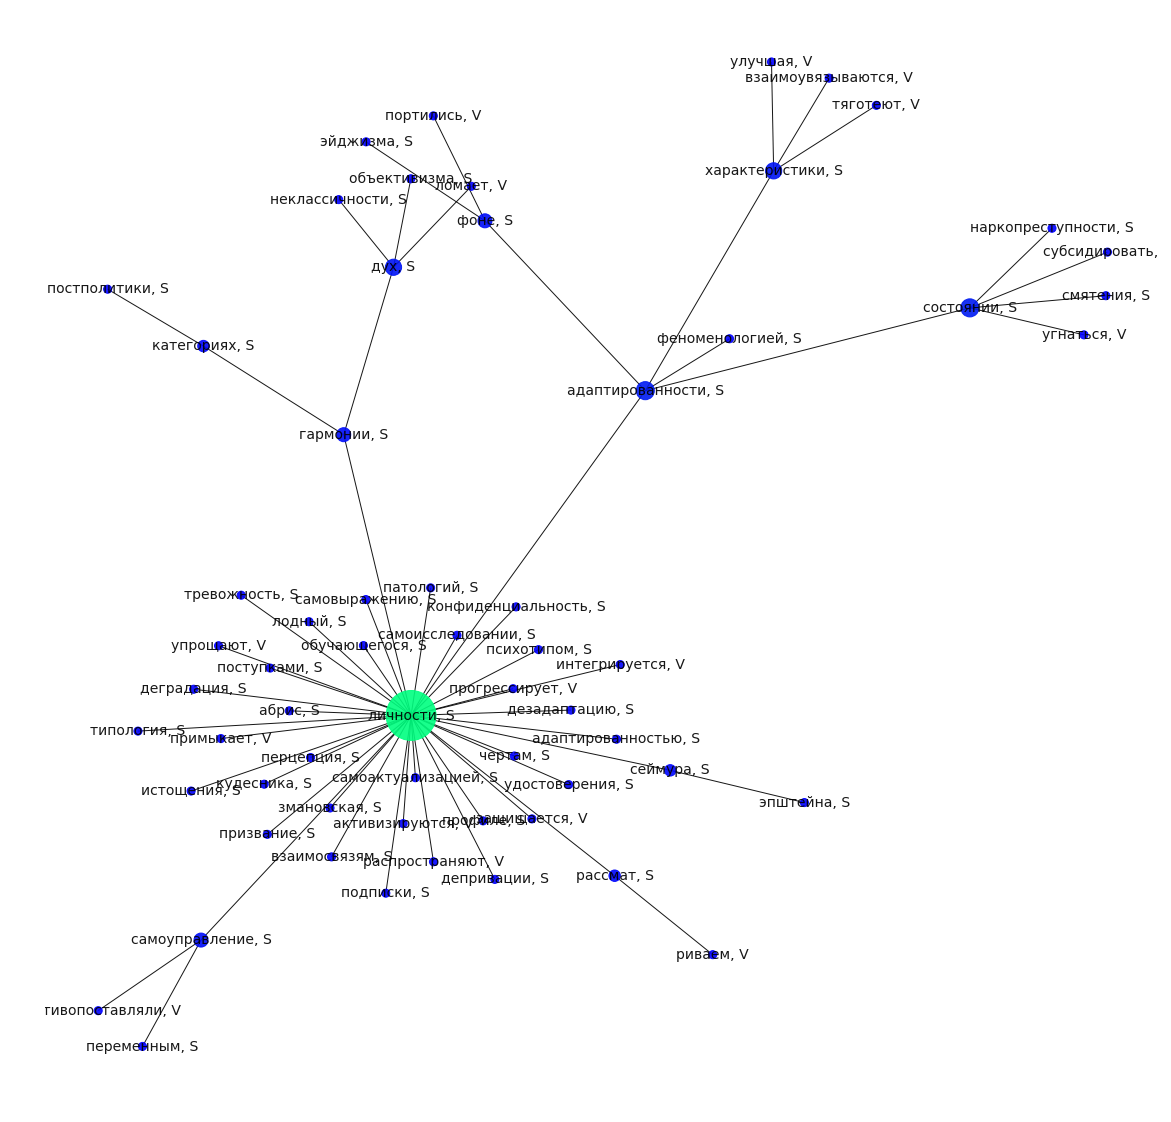

In [143]:
draw_graph(sub_graphs[25])

In [76]:
print_candidates(sub_graphs[25])

Pair: ('состоянии, S', 'гармонии, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'адаптированности, S': 1}
*******
Pair: ('адаптированности, S', 'самоуправление, S')
path length: 2
first word substitutes:
{'личности, S': 1}
second word substitutes:
{'личности, S': 1}
*******
Pair: ('адаптированности, S', 'гармонии, S')
path length: 2
first word substitutes:
{}
second word substitutes:
{'личности, S': 1}
*******
Pair: ('дух, S', 'самоуправление, S')
path length: 3
first word substitutes:
{'личности, S': 1}
second word substitutes:
{'гармонии, S': 1}
*******
Pair: ('характеристики, S', 'самоуправление, S')
path length: 3
first word substitutes:
{'личности, S': 1}
second word substitutes:
{}
*******
Pair: ('фоне, S', 'самоуправление, S')
path length: 3
first word substitutes:
{'личности, S': 1}
second word substitutes:
{'адаптированности, S': 1}
*******
Pair: ('фоне, S', 'гармонии, S')
path length: 3
first word substitutes:
{}
second word substitutes:
{'адаптирова

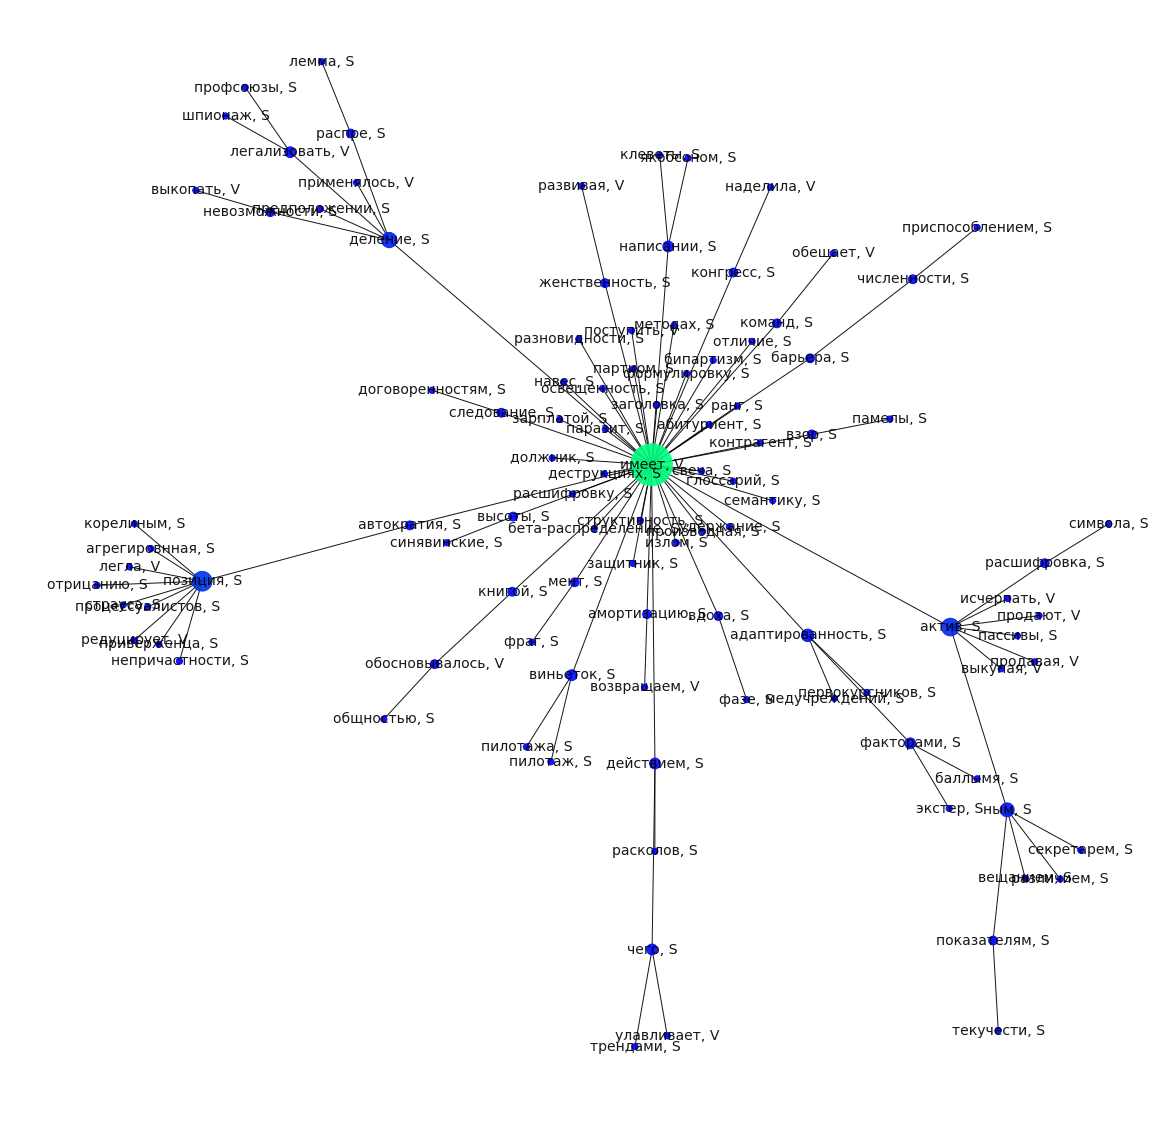

In [144]:
draw_graph(sub_graphs[91])

In [70]:
print_candidates(sub_graphs[91])

Pair: ('легализовать, V', 'действием, S')
path length: 3
first word substitutes:
[]
second word substitutes:
[('деление, S', [14.162, 1])]
*******
Pair: ('легализовать, V', 'написании, S')
path length: 3
first word substitutes:
[]
second word substitutes:
[('деление, S', [14.162, 1])]
*******
Pair: ('актив, S', 'легализовать, V')
path length: 3
first word substitutes:
[]
second word substitutes:
[('имеет, V', [6.896, 1])]
*******
Pair: ('адаптированность, S', 'легализовать, V')
path length: 3
first word substitutes:
[]
second word substitutes:
[('имеет, V', [7.921, 1])]
*******
Pair: ('виньеток, S', 'легализовать, V')
path length: 3
first word substitutes:
[]
second word substitutes:
[('имеет, V', [7.237, 1])]
*******


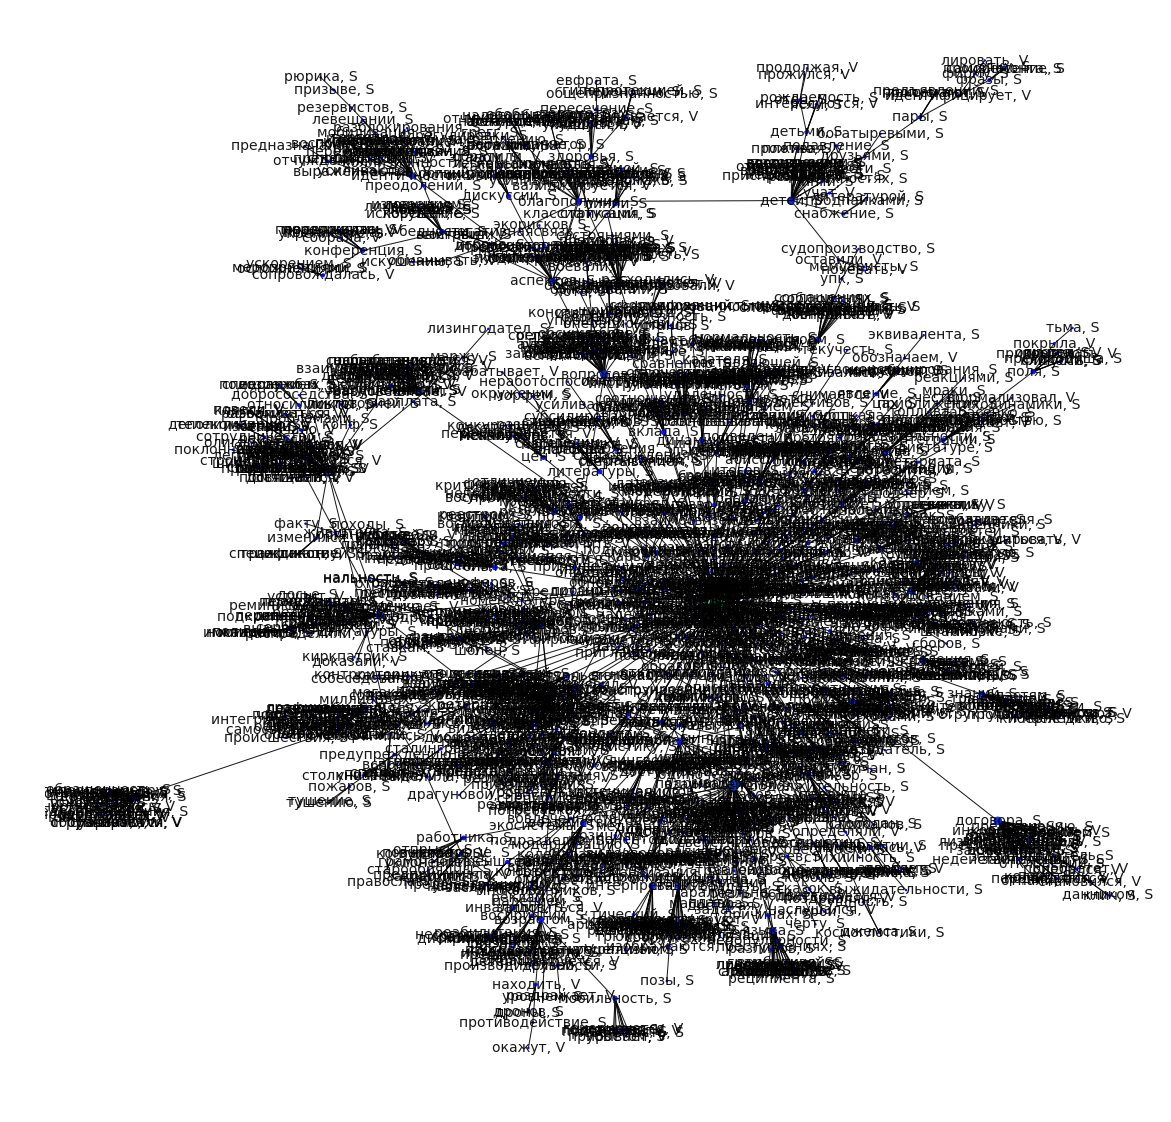

In [46]:
draw_graph(sub_graphs[339])

In [71]:
print_candidates(sub_graphs[339])

Pair: ('видов, S', 'интеграции, S')
path length: 3
first word substitutes:
[('анализ, S', [2.921, 1])]
second word substitutes:
[]
*******
Pair: ('различия, S', 'состояния, S')
path length: 2
first word substitutes:
[('анализ, S', [5.225, 1])]
second word substitutes:
[]
*******
Pair: ('понятия, S', 'потоков, S')
path length: 2
first word substitutes:
[('анализ, S', [3.812, 1])]
second word substitutes:
[]
*******
Pair: ('аспектов, S', 'индикатор, S')
path length: 2
first word substitutes:
[]
second word substitutes:
[('благополучия, S', [7.904, 1])]
*******
Pair: ('глаголов, S', 'судьбы, S')
path length: 2
first word substitutes:
[('анализ, S', [6.876, 1])]
second word substitutes:
[]
*******
Pair: ('возраста, S', 'глаголов, S')
path length: 3
first word substitutes:
[('анализ, S', [6.876, 1])]
second word substitutes:
[]
*******
Pair: ('бедности, S', 'обстоятельств, S')
path length: 3
first word substitutes:
[('анализ, S', [5.564, 1])]
second word substitutes:
[]
*******
Pair: ('бюро

Pair: ('языка, S', 'точности, S')
path length: 2
first word substitutes:
[('анализ, S', [2.434, 1])]
second word substitutes:
[]
*******
Pair: ('заключении, S', 'утверждений, S')
path length: 3
first word substitutes:
[('анализ, S', [5.345, 1])]
second word substitutes:
[('договора, S', [9.442, 1])]
*******
Pair: ('восприятии, S', 'потоков, S')
path length: 3
first word substitutes:
[('анализ, S', [5.564, 1])]
second word substitutes:
[('воздействия, S', [7.569, 1])]
*******
Pair: ('методом, S', 'динамики, S')
path length: 2
first word substitutes:
[('анализ, S', [4.798, 1])]
second word substitutes:
[]
*******
Pair: ('коэффициента, S', 'явление, S')
path length: 3
first word substitutes:
[('знаков, S', [8.004, 1])]
second word substitutes:
[]
*******
Pair: ('залогодатель, S', 'особенностей, S')
path length: 3
first word substitutes:
[('анализ, S', [5.228, 1])]
second word substitutes:
[]
*******
Pair: ('причин, S', 'выступлений, S')
path length: 2
first word substitutes:
[('анализ, S'

Pair: ('аспектов, S', 'залогодатель, S')
path length: 3
first word substitutes:
[('договора, S', [8.456, 1])]
second word substitutes:
[]
*******
Pair: ('оценок, S', 'взаимосвязей, S')
path length: 2
first word substitutes:
[('анализ, S', [2.737, 1])]
second word substitutes:
[]
*******
Pair: ('возрастом, S', 'контактов, S')
path length: 3
first word substitutes:
[('анализ, S', [4.916, 1])]
second word substitutes:
[('взаимосвязи, S', [6.657, 1])]
*******
Pair: ('восприятии, S', 'строфы, S')
path length: 3
first word substitutes:
[('анализ, S', [6.798, 1])]
second word substitutes:
[('воздействия, S', [7.569, 1])]
*******
Pair: ('коэффициента, S', 'состояния, S')
path length: 2
first word substitutes:
[('анализ, S', [4.034, 1])]
second word substitutes:
[]
*******
Pair: ('аспект, S', 'интервью, S')
path length: 3
first word substitutes:
[('анализ, S', [5.562, 1])]
second word substitutes:
[('восприятия, S', [7.142, 1])]
*******
Pair: ('аспект, S', 'способов, S')
path length: 3
first wo

Pair: ('аспект, S', 'эффективности, S')
path length: 3
first word substitutes:
[('анализ, S', [5.276, 1])]
second word substitutes:
[('восприятия, S', [7.142, 1])]
*******
Pair: ('аспектов, S', 'позиций, S')
path length: 2
first word substitutes:
[('анализ, S', [4.461, 1])]
second word substitutes:
[]
*******
Pair: ('отношения, S', 'глаголов, S')
path length: 2
first word substitutes:
[('анализ, S', [0.522, 1])]
second word substitutes:
[]
*******
Pair: ('ума, S', 'директивы, S')
path length: 3
first word substitutes:
[('анализ, S', [5.402, 1])]
second word substitutes:
[]
*******
Pair: ('понятия, S', 'постановлений, S')
path length: 2
first word substitutes:
[('анализ, S', [3.812, 1])]
second word substitutes:
[]
*******
Pair: ('кризиса, S', 'ликвидации, S')
path length: 2
first word substitutes:
[('анализ, S', [2.554, 1])]
second word substitutes:
[]
*******
Pair: ('знаний, S', 'связей, S')
path length: 2
first word substitutes:
[('анализ, S', [3.251, 1])]
second word substitutes:
[]

Pair: ('стратегий, S', 'героев, S')
path length: 3
first word substitutes:
[('взаимодействия, S', [7.757, 1])]
second word substitutes:
[]
*******
Pair: ('идентичности, S', 'информативности, S')
path length: 3
first word substitutes:
[('анализ, S', [6.653, 1])]
second word substitutes:
[]
*******
Pair: ('категорий, S', 'залогодатель, S')
path length: 3
first word substitutes:
[('договора, S', [8.456, 1])]
second word substitutes:
[]
*******
Pair: ('аспект, S', 'наличия, S')
path length: 3
first word substitutes:
[('анализ, S', [4.387, 1])]
second word substitutes:
[('восприятия, S', [7.142, 1])]
*******
Pair: ('аспект, S', 'различия, S')
path length: 3
first word substitutes:
[('анализ, S', [5.225, 1])]
second word substitutes:
[('восприятия, S', [7.142, 1])]
*******
Pair: ('договора, S', 'причин, S')
path length: 2
first word substitutes:
[('анализ, S', [2.169, 1])]
second word substitutes:
[]
*******
Pair: ('восприятия, S', 'норм, S')
path length: 2
first word substitutes:
[('анализ,

Pair: ('показателей, S', 'мнений, S')
path length: 2
first word substitutes:
[('анализ, S', [4.304, 1])]
second word substitutes:
[]
*******
Pair: ('восприятия, S', 'практики, S')
path length: 2
first word substitutes:
[('анализ, S', [3.271, 1])]
second word substitutes:
[]
*******
Pair: ('методом, S', 'надежности, S')
path length: 2
first word substitutes:
[('анализ, S', [4.798, 1])]
second word substitutes:
[]
*******
Pair: ('методом, S', 'залогодатель, S')
path length: 3
first word substitutes:
[('договора, S', [8.456, 1])]
second word substitutes:
[]
*******
Pair: ('причины, S', 'контактов, S')
path length: 2
first word substitutes:
[('анализ, S', [3.175, 1])]
second word substitutes:
[]
*******
Pair: ('отчетности, S', 'классификация, S')
path length: 3
first word substitutes:
[('занятости, S', [6.603, 1])]
second word substitutes:
[]
*******
Pair: ('форм, S', 'способов, S')
path length: 2
first word substitutes:
[('анализ, S', [3.632, 1])]
second word substitutes:
[]
*******
Pair:

Pair: ('результатов, S', 'точности, S')
path length: 2
first word substitutes:
[('анализ, S', [5.833, 1])]
second word substitutes:
[]
*******
Pair: ('продуктов, S', 'масштабов, S')
path length: 2
first word substitutes:
[('анализ, S', [5.187, 1])]
second word substitutes:
[]
*******
Pair: ('риска, S', 'постановки, S')
path length: 3
first word substitutes:
[('допустимости, S', [11.331, 1])]
second word substitutes:
[]
*******
Pair: ('участникам, S', 'образов, S')
path length: 3
first word substitutes:
[('анализ, S', [5.115, 1])]
second word substitutes:
[]
*******
Pair: ('доверия, S', 'героев, S')
path length: 3
first word substitutes:
[('взаимодействия, S', [7.757, 1])]
second word substitutes:
[]
*******
Pair: ('позиций, S', 'инвалидов, S')
path length: 3
first word substitutes:
[('воздействия, S', [6.721, 1])]
second word substitutes:
[]
*******
Pair: ('героев, S', 'продуктов, S')
path length: 3
first word substitutes:
[('анализ, S', [5.187, 1])]
second word substitutes:
[]
*******

Pair: ('нарушений, S', 'техники, S')
path length: 2
first word substitutes:
[('видов, S', [6.662, 1])]
second word substitutes:
[]
*******
Pair: ('материала, S', 'образе, S')
path length: 3
first word substitutes:
[]
second word substitutes:
[('анализ, S', [5.091, 1])]
*******
Pair: ('распределения, S', 'информативности, S')
path length: 2
first word substitutes:
[('анализ, S', [4.449, 1])]
second word substitutes:
[]
*******
Pair: ('результатов, S', 'опыта, S')
path length: 2
first word substitutes:
[('анализ, S', [5.833, 1])]
second word substitutes:
[]
*******
Pair: ('вопросов, S', 'информативности, S')
path length: 2
first word substitutes:
[('анализ, S', [2.464, 1])]
second word substitutes:
[]
*******
Pair: ('здоровья, S', 'регулирования, S')
path length: 3
first word substitutes:
[('анализ, S', [2.636, 1])]
second word substitutes:
[]
*******
Pair: ('литературы, S', 'точности, S')
path length: 2
first word substitutes:
[('анализ, S', [6.461, 1])]
second word substitutes:
[]
****

Pair: ('лидер, S', 'особенностей, S')
path length: 3
first word substitutes:
[('анализ, S', [5.228, 1])]
second word substitutes:
[]
*******
Pair: ('связи, S', 'способов, S')
path length: 2
first word substitutes:
[('анализ, S', [3.262, 1])]
second word substitutes:
[('анализ, S', [3.927, 1])]
*******
Pair: ('эффективности, S', 'форме, S')
path length: 3
first word substitutes:
[('восприятия, S', [4.891, 1])]
second word substitutes:
[]
*******
Pair: ('показателей, S', 'позиций, S')
path length: 2
first word substitutes:
[('анализ, S', [4.304, 1])]
second word substitutes:
[]
*******
Pair: ('отчетности, S', 'мнений, S')
path length: 2
first word substitutes:
[('анализ, S', [5.187, 1])]
second word substitutes:
[]
*******
Pair: ('степени, S', 'материала, S')
path length: 2
first word substitutes:
[('анализ, S', [1.299, 1])]
second word substitutes:
[]
*******
Pair: ('форм, S', 'противоречий, S')
path length: 2
first word substitutes:
[('анализ, S', [3.632, 1])]
second word substitutes:


Pair: ('понятия, S', 'причины, S')
path length: 2
first word substitutes:
[('анализ, S', [3.812, 1])]
second word substitutes:
[]
*******
Pair: ('карьеры, S', 'способов, S')
path length: 3
first word substitutes:
[('анализ, S', [3.927, 1])]
second word substitutes:
[]
*******
Pair: ('вклада, S', 'рас, S')
path length: 2
first word substitutes:
[('анализ, S', [5.163, 1])]
second word substitutes:
[]
*******
Pair: ('бюрократии, S', 'образов, S')
path length: 2
first word substitutes:
[('анализ, S', [6.045, 1])]
second word substitutes:
[]
*******
Pair: ('воздействия, S', 'регулирования, S')
path length: 2
first word substitutes:
[('анализ, S', [5.157, 1])]
second word substitutes:
[]
*******
Pair: ('окончания, S', 'особенностей, S')
path length: 3
first word substitutes:
[('анализ, S', [5.228, 1])]
second word substitutes:
[]
*******
Pair: ('показателей, S', 'употребления, S')
path length: 2
first word substitutes:
[('анализ, S', [4.304, 1])]
second word substitutes:
[]
*******
Pair: ('к

Pair: ('стратегий, S', 'способов, S')
path length: 2
first word substitutes:
[('анализ, S', [3.733, 1])]
second word substitutes:
[]
*******
Pair: ('дифференциации, S', 'морфологии, S')
path length: 3
first word substitutes:
[('взаимодействия, S', [8.061, 1])]
second word substitutes:
[]
*******
Pair: ('аспект, S', 'категорий, S')
path length: 3
first word substitutes:
[('анализ, S', [3.733, 1])]
second word substitutes:
[('восприятия, S', [7.142, 1])]
*******
Pair: ('языка, S', 'цен, S')
path length: 2
first word substitutes:
[('анализ, S', [2.434, 1])]
second word substitutes:
[]
*******
Pair: ('риска, S', 'конституционности, S')
path length: 3
first word substitutes:
[('вопросов, S', [7.8, 1])]
second word substitutes:
[]
*******
Pair: ('ума, S', 'регулирования, S')
path length: 3
first word substitutes:
[('анализ, S', [2.636, 1])]
second word substitutes:
[]
*******
Pair: ('регулирования, S', 'особенностей, S')
path length: 2
first word substitutes:
[('анализ, S', [2.636, 1])]
seco

Pair: ('отношения, S', 'степени, S')
path length: 2
first word substitutes:
[('анализ, S', [0.522, 1])]
second word substitutes:
[]
*******
Pair: ('строфы, S', 'контактов, S')
path length: 2
first word substitutes:
[('анализ, S', [6.798, 1])]
second word substitutes:
[]
*******
Pair: ('категорий, S', 'строфы, S')
path length: 2
first word substitutes:
[('анализ, S', [3.733, 1])]
second word substitutes:
[]
*******
Pair: ('договора, S', 'судьбы, S')
path length: 2
first word substitutes:
[('анализ, S', [2.169, 1])]
second word substitutes:
[]
*******
Pair: ('блоки, S', 'контактов, S')
path length: 3
first word substitutes:
[('анализ, S', [4.916, 1])]
second word substitutes:
[('вопросов, S', [9.134, 1])]
*******
Pair: ('возраста, S', 'потоков, S')
path length: 3
first word substitutes:
[('анализ, S', [5.564, 1])]
second word substitutes:
[]
*******
Pair: ('стратегий, S', 'честь, S')
path length: 3
first word substitutes:
[('понятия, S', [8.757, 1])]
second word substitutes:
[]
*******
P

KeyboardInterrupt: 

In [99]:
#check how often candidate with most rank is also first by pmi
#check how often this candidate is in the first half
def compare_to_pmi(graph):
    all_substitutes = 0
    first_rank = 0
    in_first_half = 0
    
    candidate_pairs = find_substitution_pairs(graph)
    for pair in candidate_pairs:
        substitutes = candidate_lookup(graph, pair)
        if substitutes:
            paired = pair[0]
            first_word = paired[0].split()[0][:-1]
            second_word = paired[1].split()[0][:-1]
            path_length = pair[1]
            first_substitutes = substitutes[0]
            second_substitutes = substitutes[1]
            if first_substitutes:
                all_substitutes += len(first_substitutes.items())
                ranked_first = sorted(first_substitutes, reverse=True, key=itemgetter(1))[0]
                ranked_first_pmi = float(graph[ranked_first][paired[1]]['weight'])
                data_piece = sequences.loc[sequences['second_word'] == second_word]
                data_piece = data_piece.sort_values(by='pmi', ascending=False)
                first_by_pmi = float(data_piece.iloc[0]['pmi'])
                if ranked_first_pmi == first_by_pmi:
                    first_rank += 1
                if str(ranked_first_pmi) in data_piece.head(int(len(data_piece)/2))['pmi'].unique():
                    in_first_half += 1
            if second_substitutes:
                all_substitutes += len(second_substitutes.items())
                ranked_first = sorted(second_substitutes, reverse=True, key=itemgetter(1))[0]
                ranked_first_pmi = float(graph[ranked_first][paired[0]]['weight'])
                data_piece = sequences.loc[sequences['first_word'] == first_word]
                data_piece = data_piece.sort_values(by='pmi', ascending=False)
                first_by_pmi = float(data_piece.iloc[0]['pmi'])
                if ranked_first_pmi == first_by_pmi:
                    first_rank += 1
                if str(ranked_first_pmi) in data_piece.head(int(len(data_piece)/2))['pmi'].unique():
                    in_first_half += 1
                    
    return (all_substitutes, first_rank, in_first_half)
                   

In [101]:
compare_to_pmi(sub_graphs[91])

(5, 1, 2)

In [91]:
little_df = sequences.loc[sequences['first_word'] == 'анализ']

In [92]:
little_df = little_df.sort_values(by='pmi', ascending=False)

In [94]:
little_df.iloc[0]

first_word             анализ
second_word    подверженности
first_tag                   S
second_tag                  S
pmi                     9.461
Name: 2469, dtype: object

In [98]:
'4.798' in little_df.head(int(len(little_df)/2))['pmi'].unique()

True

## Average clustering coefficient

In [156]:
all_clustering = []
for subgraph in sub_graphs:
    all_clustering.append(nx.average_clustering(subgraph))

In [157]:
set(all_clustering)

{0.0}

In [158]:
all_transitivity = []
for subgraph in sub_graphs:
    all_transitivity.append(nx.transitivity(subgraph))

In [159]:
set(all_transitivity)

{0}

In [164]:
all_triangles = []
for subgraph in sub_graphs:
    all_triangles.append(sum(nx.triangles(subgraph).values())/3)

In [165]:
set(all_triangles)

{0.0}

In [183]:
all_assortativity = []
for subgraph in sub_graphs:
    all_assortativity.append(nx.degree_assortativity_coefficient(subgraph))

C:\Users\vasel\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [189]:
assortativities = [i for i in list(set(all_assortativity)) if str(i) != 'nan']

In [192]:
np.mean(assortativities)

-0.5366050610265477

## Node degree distribution

In [103]:
degrees = sorted(nx.degree(G),reverse=True,key=itemgetter(1))

In [104]:
nodes_to_take = []

for node in degrees[:100]:
    for i in range(len(sub_graphs)):
        if node[0] in sub_graphs[i].nodes():
            nodes_to_take.append(i)

In [106]:
node_pmi_counts = {}

for i in range(len(nodes_to_take)):
    values = compare_to_pmi(sub_graphs[nodes_to_take[i]])
    node_pmi_counts.update({degrees[i][0]:values})

KeyboardInterrupt: 

In [107]:
import json

with open('node_pmi.json', 'w', encoding='utf-8') as f:
    json.dump(node_pmi_counts, f)

In [109]:
len(node_pmi_counts.items())

29

In [168]:
d=nx.degree_histogram(G)
c = range(0,100,1)

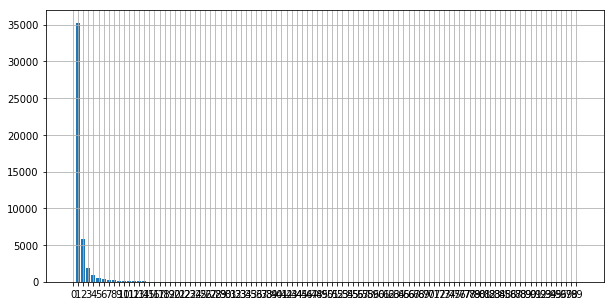

In [169]:
plt.figure(figsize=(10,5))
plt.bar(c,d[:100],align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

In [170]:
dcent = nx.degree_centrality(G)

In [171]:
centrality = sorted(dcent.items(),reverse=True,key = itemgetter(1))

In [172]:
centrality[:100]

[('будет, V', 0.007135885478798395),
 ('был, V', 0.006745472291508513),
 ('было, V', 0.006528576076347468),
 ('были, V', 0.005313957271445614),
 ('может, V', 0.005140440299316777),
 ('была, V', 0.004728337490510791),
 ('анализ, S', 0.004164407331092072),
 ('время, S', 0.0038824422513827135),
 ('возможность, S', 0.0038173733868344),
 ('автор, S', 0.0033185120919639955),
 ('авторы, S', 0.003231753605899577),
 ('могут, V', 0.00310161587680295),
 ('спбгу, S', 0.0029280989046741135),
 ('анализа, S', 0.0028630300401257997),
 ('быть, V', 0.0028413404186096954),
 ('возможности, S', 0.0026461338249647542),
 ('является, V', 0.0024943064743520225),
 ('будут, V', 0.0024509272313198134),
 ('власти, S', 0.002429237609803709),
 ('времени, S', 0.0023207895022231864),
 ('вестник, S', 0.0019303763149333044),
 ('внимание, S', 0.0018653074503849909),
 ('войны, S', 0.0018219282073527816),
 ('государства, S', 0.0018002385858366771),
 ('деятельности, S', 0.0017568593428044681),
 ('все, S', 0.0016917904782561

In [177]:
def make_graph_by_tag(tag, df):
    
    first_word = []
    second_word = []
    first_tag = []
    second_tag = []
    pmi = []

    for i in range(len(df)):
        if (df['tag'][i].split()[0] in tag and df['tag'][i].split()[1] in tag) and not (len(df['ngram'][i].split()[0])==1 or len(df['ngram'][i].split()[1])==1):
            first_word.append(df['ngram'][i].split()[0])
            second_word.append(df['ngram'][i].split()[1])
            first_tag.append(df['tag'][i].split()[0])
            second_tag.append(df['tag'][i].split()[1])
            pmi.append('%.3f'%float(df['pmi'][i]))
    
    sequences = pd.DataFrame({'first_word':first_word
                         , 'second_word':second_word
                         , 'first_tag':first_tag
                         , 'second_tag':second_tag
                         , 'pmi':pmi})
    
    G = nx.Graph()
    
    for i in range(len(sequences)):
        first_node = '{0}, {1}'.format(sequences['first_word'][i], sequences['first_tag'][i])
        second_node = '{0}, {1}'.format(sequences['second_word'][i], sequences['second_tag'][i])
        if first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif second_node in G.nodes() and not first_node in G.nodes():
            G.add_node(first_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif not first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(first_node)
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        else:
            pass
        
    return G

In [178]:
N = make_graph_by_tag('S', df)

In [179]:
V = make_graph_by_tag('V', df)

In [180]:
def draw_degree_hist(graph):
    d = nx.degree_histogram(graph)
    c = range(0,100,1)
    plt.figure(figsize=(10,5))
    plt.bar(c,d[:100],align='center')
    plt.xticks(c)
    plt.grid(True,which='both')
    plt.show()

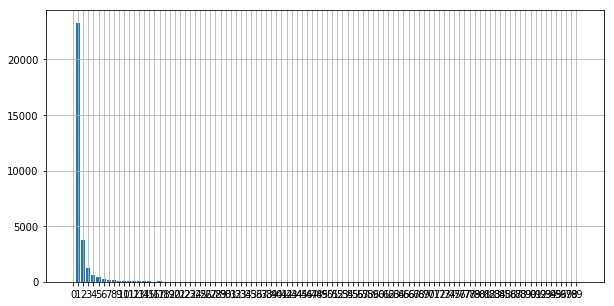

In [181]:
draw_degree_hist(N)

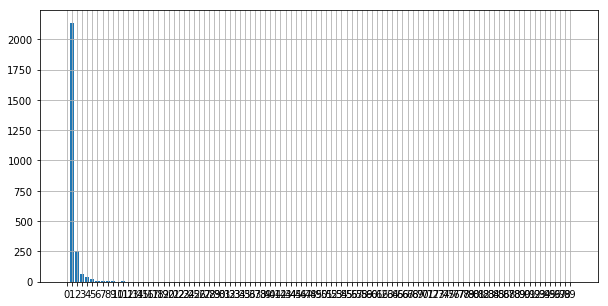

In [182]:
draw_degree_hist(V)

In [193]:
def get_most_common(graph):
    degrees = sorted(nx.degree(graph),reverse=True,key=itemgetter(1))
    print(degrees[:100])

In [194]:
get_most_common(N)

[('анализ, S', 165), ('спбгу, S', 145), ('анализа, S', 113), ('время, S', 101), ('времени, S', 100), ('вестник, S', 95), ('власти, S', 87), ('деятельности, S', 87), ('государства, S', 73), ('возможность, S', 67), ('войны, S', 65), ('россии, S', 63), ('жизни, S', 63), ('это, S', 62), ('истории, S', 61), ('александр, S', 58), ('внимание, S', 55), ('модели, S', 53), ('банка, S', 53), ('населения, S', 52), ('исследования, S', 52), ('автора, S', 51), ('активов, S', 50), ('возможности, S', 50), ('данных, S', 48), ('акций, S', 47), ('сша, S', 46), ('взаимодействия, S', 46), ('зрения, S', 46), ('все, S', 45), ('города, S', 44), ('работе, S', 44), ('автор, S', 43), ('влияния, S', 43), ('безопасности, S', 43), ('группы, S', 42), ('влияние, S', 42), ('информации, S', 40), ('активности, S', 40), ('государств, S', 40), ('мира, S', 39), ('личности, S', 38), ('типа, S', 38), ('общества, S', 38), ('место, S', 37), ('действий, S', 36), ('большинство, S', 36), ('количество, S', 35), ('банков, S', 35), (

In [195]:
get_most_common(V)

[('будет, V', 219), ('может, V', 198), ('могут, V', 165), ('было, V', 90), ('будут, V', 85), ('будем, V', 48), ('быть, V', 46), ('позволяет, V', 45), ('был, V', 44), ('были, V', 44), ('мог, V', 37), ('могли, V', 32), ('можем, V', 31), ('следует, V', 29), ('была, V', 23), ('начинает, V', 21), ('могла, V', 18), ('стали, V', 18), ('могло, V', 17), ('позволяют, V', 15), ('стала, V', 14), ('начинают, V', 13), ('исходя, V', 12), ('позволило, V', 12), ('желая, V', 11), ('начал, V', 11), ('начали, V', 11), ('стал, V', 11), ('удалось, V', 11), ('пытается, V', 10), ('смогли, V', 10), ('буду, V', 9), ('позволит, V', 9), ('продолжает, V', 9), ('хочет, V', 9), ('заставляет, V', 8), ('стоит, V', 8), ('приходится, V', 8), ('взять, V', 7), ('вести, V', 7), ('работать, V', 7), ('жить, V', 7), ('начиная, V', 7), ('начала, V', 7), ('предстоит, V', 7), ('решил, V', 7), ('делать, V', 6), ('знать, V', 6), ('понять, V', 6), ('сказать, V', 6), ('найти, V', 6), ('выявить, V', 6), ('сможет, V', 6), ('стремится,